<a href="https://www.kaggle.com/code/yassinesadiki/intel-image-classification-pytorch-ipynb?scriptVersionId=283468820" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Multi-Class Image Classifier with CNN PyTorch**

 **about:**
 * in this project we are working on a multi-class image classification problem using CNN from the pytorch framework ,for that we will be using a datasets called intel-image-classification this data representes natural scene from montains to landscapes .

   
| Category   | Description                        | encoder  |
|------------|------------------------------------|-----|
| buildings  | Urban buildings and structures     | 0   |
| forest     | Forests and tree-covered areas     | 1   |
| glacier    | Snowy/glacial regions              | 2   |
| mountain   | Mountains and highlands            | 3   |
| sea        | Ocean and coastal areas            | 4   |
| street     | Streets and urban roads            | 5   |


**Project Workflow:**
1. Loading the libraries and packages
2. Loading and preparing the data
3. Preprocessing the data by resizing and normalizing the image data 
4. Creating dataloaders and visualizing a sample of the training images
5. Building the model architecture and setting the loss function and optimizer
6. Building the training loop and training the model
7. visualising the model performance metrics, loss and accuracy
8. Testing our model accuracy using unseen data `preds_data`



## **importing the required Libraries**

In [1]:

import numpy as np 
import pandas as pd 
import torch 
from torch import nn 
import torchvision
from torch.optim import Adam
from torchvision import transforms ,datasets
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader 
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from PIL import Image 
import math 
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import os 


### **Setting the device to cuda**

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('the device is :',device )

the device is : cuda


In [3]:
device = torch.device(device)

## **Data Loading :**

In [4]:
pred_dir = "/kaggle/input/intel-image-classification/seg_pred/seg_pred"
test_dir = "/kaggle/input/intel-image-classification/seg_test/seg_test"
train_dir = "/kaggle/input/intel-image-classification/seg_train/seg_train"

## **Data preprocessing**

In [5]:
transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
transforms.Normalize(mean=[0.5]*3,std=[0.5]*3)
])

In [6]:
# setting the hyperparameters
Batch_size = 32

In [7]:
train_data = ImageFolder(train_dir,transform=transform)
test_data = ImageFolder(test_dir,transform=transform)


train_loader = DataLoader(train_data,batch_size=Batch_size,shuffle=True)
test_loader = DataLoader(test_data,batch_size=Batch_size,shuffle=True)

In [8]:
class_names = train_data.classes
class_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [9]:
train_loader

In [10]:
for image , clas in train_loader:
    classs = clas
    break 

## Visualizing training samples

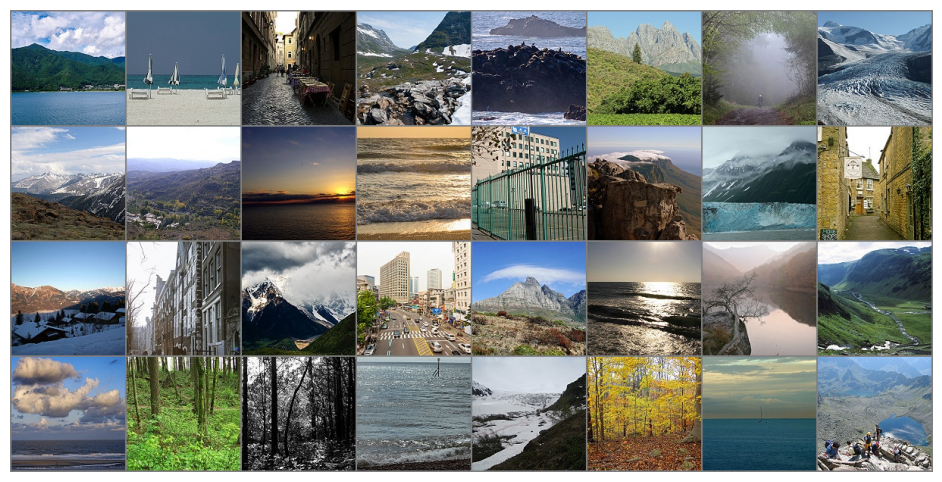

In [11]:
import matplotlib.pyplot as plt

images, labels = next(iter(train_loader))

# Make a grid of images
img_grid = torchvision.utils.make_grid(images, nrow=8)  # arrange in rows
img_grid = img_grid / 2 + 0.5  # unnormalize
np_img = img_grid.numpy().transpose((1, 2, 0))  # CHW -> HWC

#plotting the images
plt.figure(figsize=(12, 6))
plt.imshow(np_img)
plt.axis("off")
plt.show()

## **defining Convolutionnal Neural Network Architecture**

In [12]:
class CNN_Model(nn.Module):
    def __init__(self,num_classes):
        super(CNN_Model,self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(3,32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32,64, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(64,128, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(128 * 18 * 18 ,512), nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512,num_classes)
            )
    def forward(self, x):
        return self.net(x)


## **Loss and Optimize**

In [13]:
model = CNN_Model(len(class_names)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(),lr=0.001)

## **Building the training loop**

In [14]:
epochs=25

total_train_loss = []
total_train_acc = []
total_test_loss = []
total_test_acc = []

#setting the model to training mode
model.train()
for ep in range(epochs):
    # storing the epoch lvl loss and accuracy
    train_loss = 0 
    train_acc = 0
    for img , lab in train_loader:
        img , lab = img.to(device) ,lab.to(device)
        optimizer.zero_grad()
        
        output = model(img)
        loss = criterion(output,lab)
        train_loss += loss.item()
        
        preds = output.argmax(dim=1)
        acc = (preds == lab).sum()
        train_acc += acc.item() 

        loss.backward()
        optimizer.step()
      
    model.eval()
    with torch.no_grad():
        test_loss = 0
        test_acc = 0
        for img , lab in test_loader:
            img , lab = img.to(device) ,lab.to(device)
            
            output = model(img)
            loss = criterion(output,lab)
            test_loss += loss.item()
            
            preds = output.argmax(dim=1)
            acc = (preds == lab).sum()
            test_acc += acc.item()
        
    total_train_loss.append(round(train_loss,4))
    total_train_acc.append(round(train_acc/len(train_data)*100,4))
    total_test_loss.append(round(test_loss,4))
    total_test_acc.append(round(test_acc/len(test_data),4))

    print(f"epoch : {ep} \ train loss : {round(train_loss,4)} \ train accuray : {round(train_acc/len(train_data)*100,4)} \ test loss : {round(test_loss,4)} \ test accuray : {round(test_acc/len(test_data)*100,4)} ")

epoch : 0 \ train loss : 416.8583 \ train accuray : 63.0469 \ test loss : 67.9692 \ test accuray : 72.6 
epoch : 1 \ train loss : 246.1379 \ train accuray : 79.5924 \ test loss : 51.2709 \ test accuray : 80.4333 
epoch : 2 \ train loss : 175.5046 \ train accuray : 85.5209 \ test loss : 43.24 \ test accuray : 83.9333 
epoch : 3 \ train loss : 115.6614 \ train accuray : 90.3876 \ test loss : 60.2803 \ test accuray : 80.1333 
epoch : 4 \ train loss : 61.9213 \ train accuray : 95.1689 \ test loss : 62.0618 \ test accuray : 83.9 
epoch : 5 \ train loss : 39.8401 \ train accuray : 97.1498 \ test loss : 70.3921 \ test accuray : 83.1667 
epoch : 6 \ train loss : 32.4762 \ train accuray : 97.6058 \ test loss : 85.3609 \ test accuray : 80.3667 
epoch : 7 \ train loss : 19.7603 \ train accuray : 98.6533 \ test loss : 106.594 \ test accuray : 80.3667 
epoch : 8 \ train loss : 17.8811 \ train accuray : 98.753 \ test loss : 105.7269 \ test accuray : 80.7 
epoch : 9 \ train loss : 22.0795 \ train acc

## **Visualisation of the model performance metrics loss and accuracy**

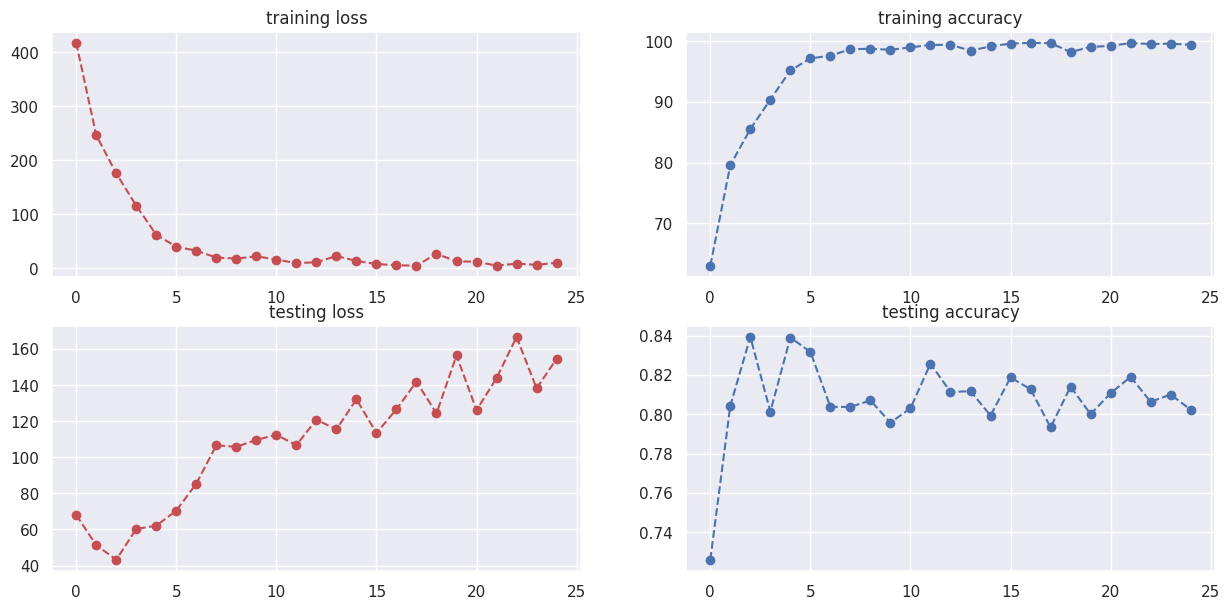

In [15]:
import seaborn as sns 
sns.set_style('darkgrid')
sns.set_theme('notebook')
def plot_line(i:int,data:list,title:str,loss=False):
    if loss == True :
        color = "r"
    else :
        color = "b"
    ax[i].plot(range(0,epochs),data,linestyle="--",c=color,marker="o")
    ax[i].set_title(title)



fig , ax = plt.subplots(2,2,figsize=(15,7))
ax = ax.flatten()
plot_line(0,total_train_loss,'training loss',loss=True)
plot_line(1,total_train_acc,'training accuracy',loss=False)
plot_line(2,total_test_loss,'testing loss',loss=True)
plot_line(3,total_test_acc,'testing accuracy',loss=False)

In [16]:

from tqdm import tqdm_notebook
image_path = [os.path.join(pred_dir,f) for f in os.listdir(pred_dir) if f.endswith(".jpg") ]

results = []
model.eval()
for img_path in tqdm_notebook(image_path):
    img = Image.open(img_path).convert("RGB")
    input_tensor = transform(img).unsqueeze(0).to(device)

    with torch.inference_mode():
        preds = model(input_tensor)
        _,predicted = torch.max(preds,1)
        label = class_names[predicted.item()]
        results.append((os.path.basename(img_path),label))
for name , label in results[:10]:
     print(f'{name } -> {label}')



/tmp/ipykernel_19/4209675325.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for img_path in tqdm_notebook(image_path):


  0%|          | 0/7301 [00:00<?, ?it/s]

6234.jpg -> sea
22288.jpg -> street
20529.jpg -> mountain
21440.jpg -> buildings
5982.jpg -> mountain
7737.jpg -> buildings
2081.jpg -> sea
10054.jpg -> glacier
3919.jpg -> sea
21838.jpg -> forest


In [17]:
labels = [label for _,label in results]
image_data = pd.DataFrame({
    "image_path":image_path,
    "labels":labels
})
image_data

image_path     labels
0     /kaggle/input/intel-image-classification/seg_p...        sea
1     /kaggle/input/intel-image-classification/seg_p...     street
2     /kaggle/input/intel-image-classification/seg_p...   mountain
3     /kaggle/input/intel-image-classification/seg_p...  buildings
4     /kaggle/input/intel-image-classification/seg_p...   mountain
...                                                 ...        ...
7296  /kaggle/input/intel-image-classification/seg_p...     street
7297  /kaggle/input/intel-image-classification/seg_p...    glacier
7298  /kaggle/input/intel-image-classification/seg_p...  buildings
7299  /kaggle/input/intel-image-classification/seg_p...     forest
7300  /kaggle/input/intel-image-classification/seg_p...     forest

[7301 rows x 2 columns]

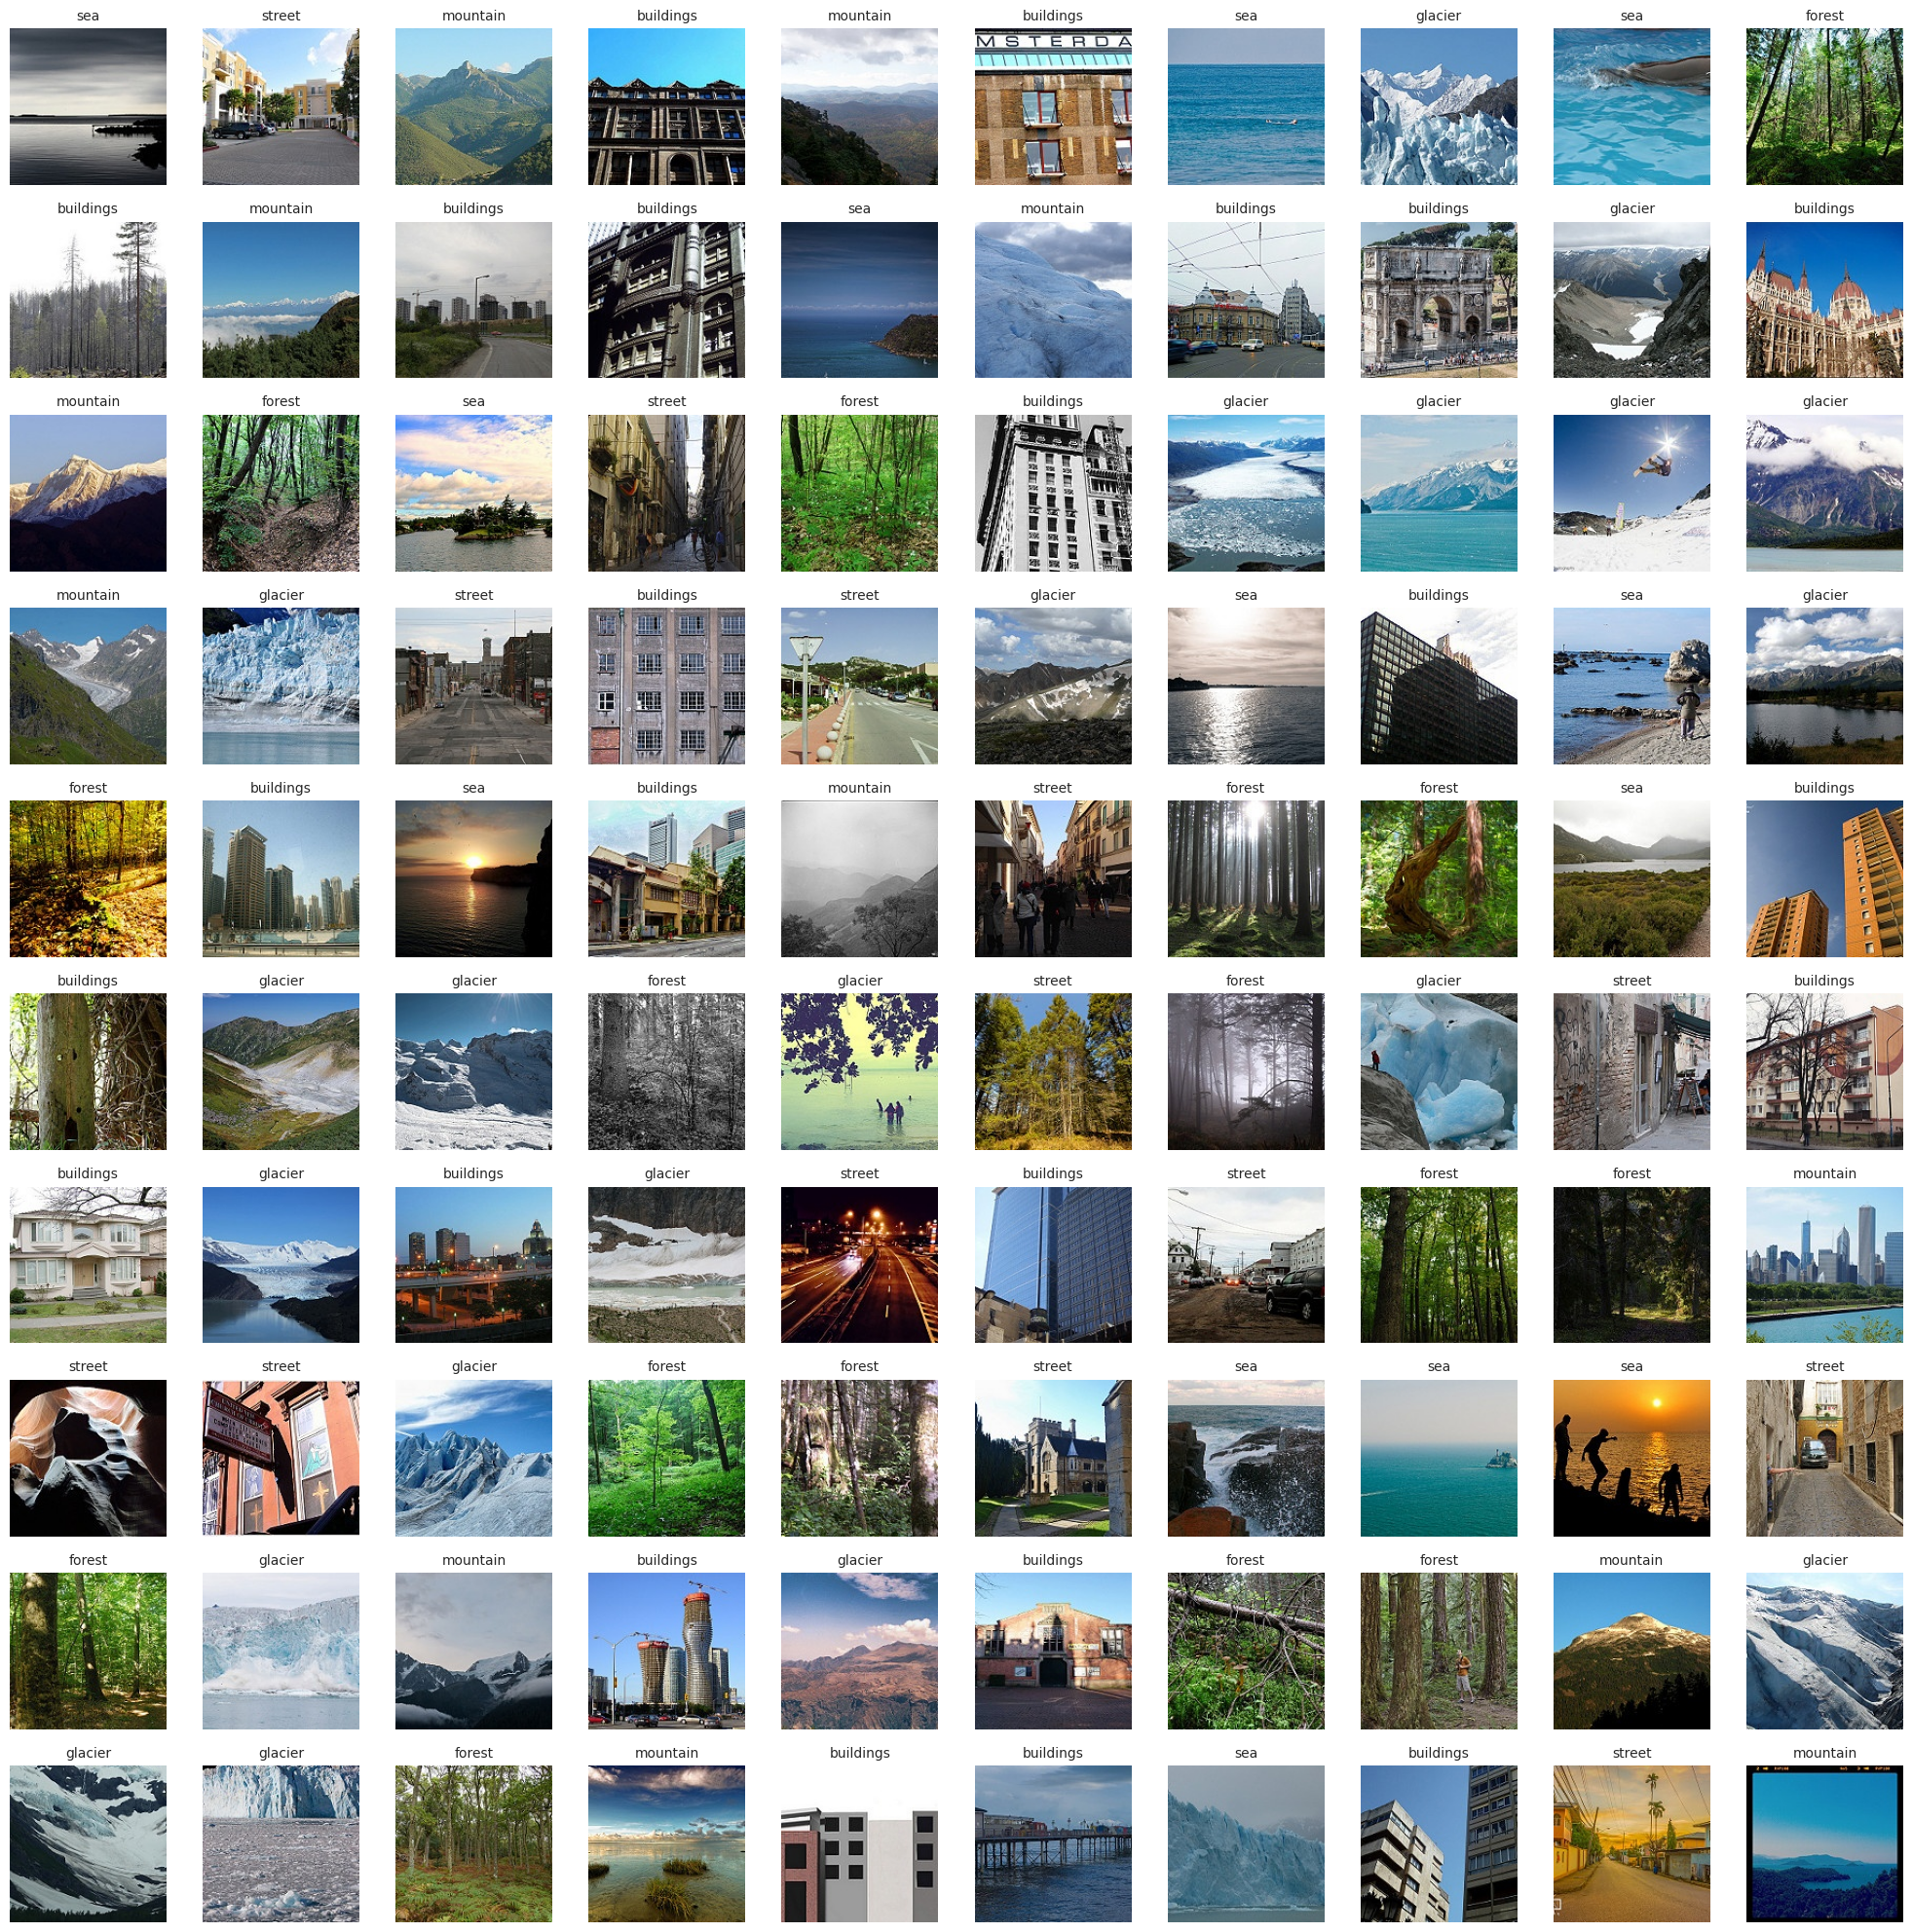

In [18]:
fig , ax = plt.subplots(10,10,figsize=(20,20))
ax = ax.flatten()
for i in range(len(ax)):
    ax[i].imshow(Image.open(image_data.iloc[i,0]))
    ax[i].set_title(f"{image_data.iloc[i,1]}",size=10)
    ax[i].axis('off')
plt.tight_layout()    

In [19]:
#saving the model
model_scripted = torch.jit.script(model)
model_scripted.save("intel_model.pt")


In [20]:
model_scripted.save("/kaggle/working/model_scripted.pt")